While I may have a solid theoretical understanding of time-series analysis, I've recently learned the difficulty in trying to dive head first into performing it in R. After several hours this morning try to use an ARIMA model towards a Kaggle challenge, I realized I should get some practice at a simple dataset before applying to a much more complex one. Below is my work-through of a great tutorial I found on the subject at Analytics Vidhya.

In [1]:
knitr::opts_chunk$set(echo = TRUE)
#Andrew Trick, 5/18/2018

# Time Series Practice

As stated above, I realized I need some guidance before diving in. I found a nice tutorial and explaination guide on how to perform time-series analysis (particularly ARIMA modeling) at Analytics Vidhya by Tavish Srivatavia. Below my work through the tutorial so as to hopefully get a better grasp on applying the model in R.

Tutorial located at: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/



In [4]:
df <- AirPassengers


data(df)
class(df)

Warning message in data(df):
"data set 'df' not found"

[1] "ts"

# Exploring
First step is to check if the series is stationary and get a feel for how its looking overall.


[1] 12
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  104.0   180.0   265.5   280.3   360.5   622.0 


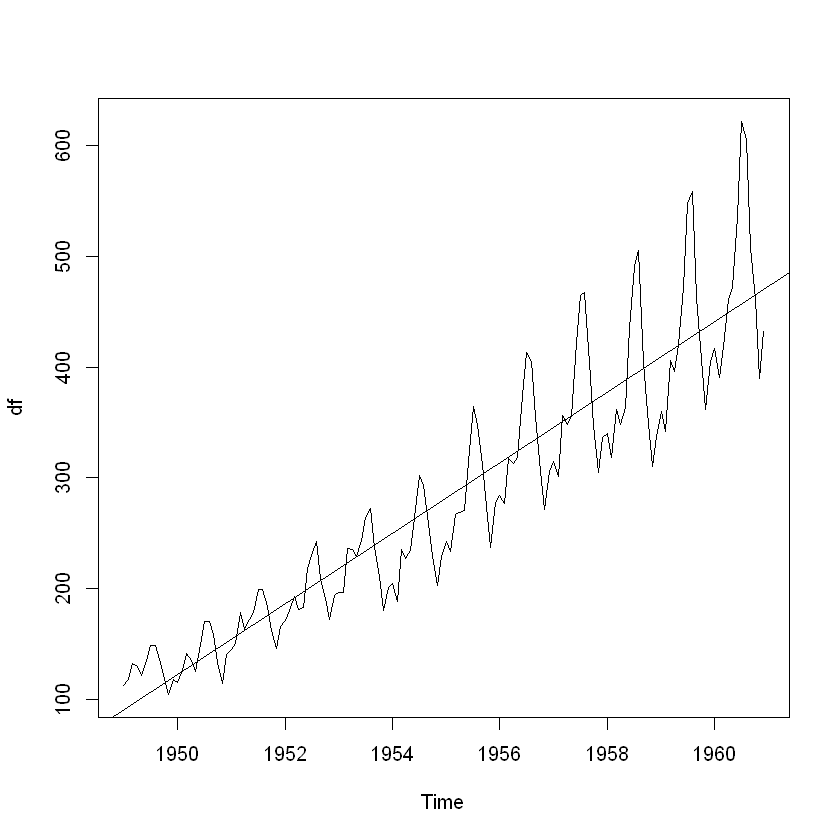

In [5]:
print(frequency(df))

print(summary(df))

plot(df)
abline(reg=lm(df~time(df)))

Obviously not stationary and prone to seasonal tendencies. This will have to be adjusted for eventually.

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949   1   2   3   4   5   6   7   8   9  10  11  12
1950   1   2   3   4   5   6   7   8   9  10  11  12
1951   1   2   3   4   5   6   7   8   9  10  11  12
1952   1   2   3   4   5   6   7   8   9  10  11  12
1953   1   2   3   4   5   6   7   8   9  10  11  12
1954   1   2   3   4   5   6   7   8   9  10  11  12
1955   1   2   3   4   5   6   7   8   9  10  11  12
1956   1   2   3   4   5   6   7   8   9  10  11  12
1957   1   2   3   4   5   6   7   8   9  10  11  12
1958   1   2   3   4   5   6   7   8   9  10  11  12
1959   1   2   3   4   5   6   7   8   9  10  11  12
1960   1   2   3   4   5   6   7   8   9  10  11  12

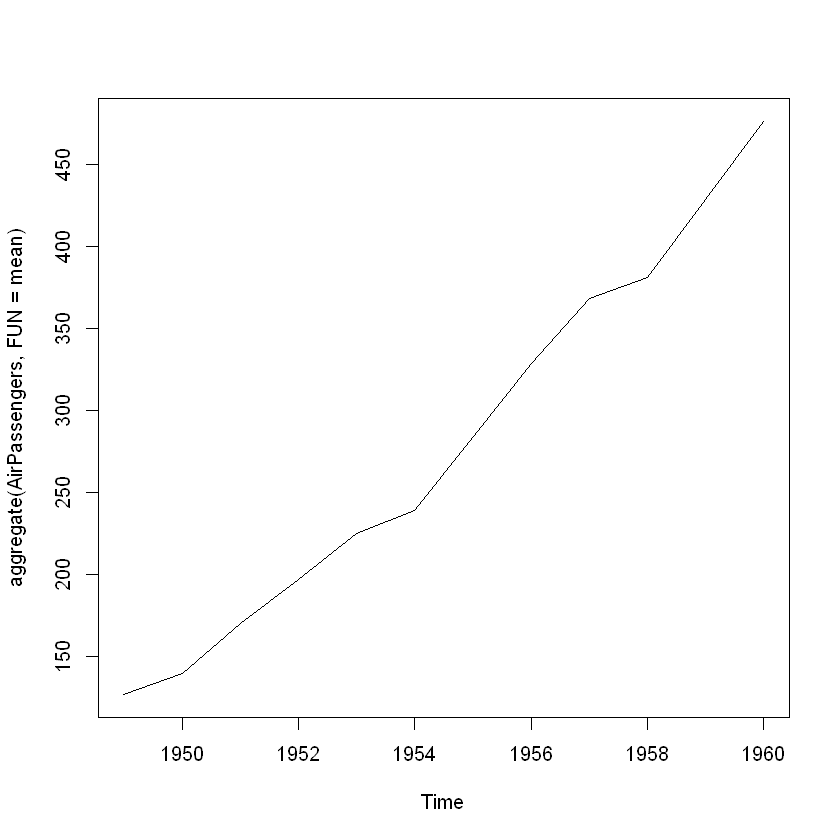

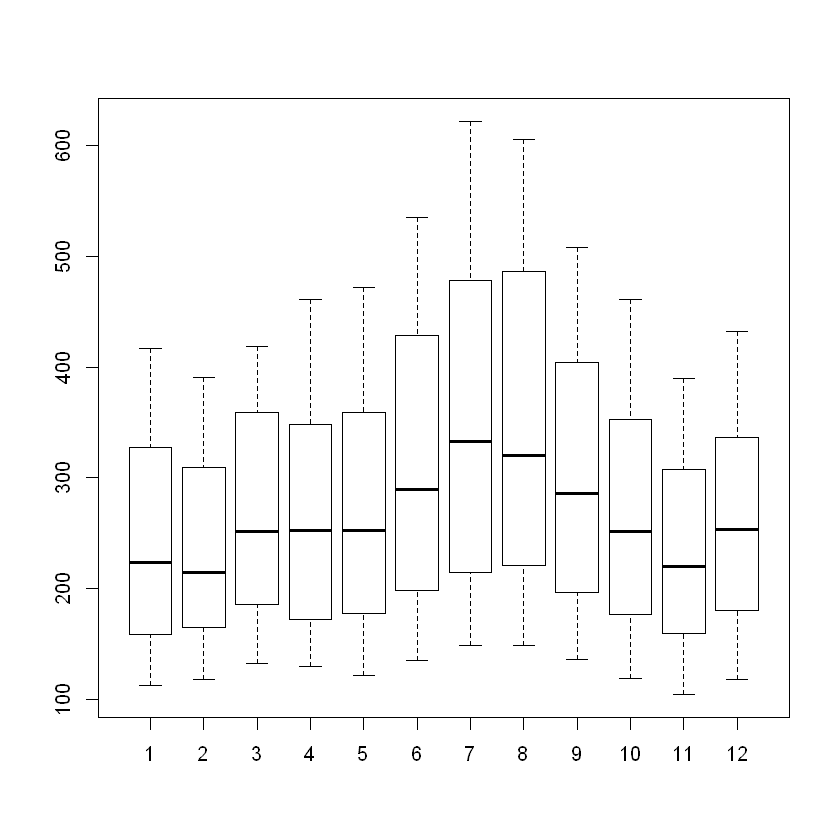

In [6]:
cycle(AirPassengers)
plot(aggregate(AirPassengers,FUN=mean)) #mean passangers by year
boxplot(AirPassengers~cycle(AirPassengers)) #boxplots of passangers by month

These give a look at the overall trend of in the dataset. While noticeable in the original plot, it provides two more views  smooths to give a better understanding. 
Firstly, theres a upward trend in the data. Second, the summer months tend to see higher passanger volume along with a wider variance.

The reletively small variances imply that a cycle of 12 months fits the data well, pretty implied for something like this.

# Officially check for stationarity
Using the Augmented Dickey-Fuller test and auto-correlation plots, we can officially check for stationarity. If results indicate non-stationary data as expected, there will be a need to differentiate. 

# Note to Self
-Log is used in the code below to equalize the uneven variance throughout the time-series.
-Diff is used to differenatiate the series to make up for the trend

Additionally:
  ACF plot - checks lags in MA
  PACF plot - checks lags in AR
  
  
Consider:
-Do the values die off asignificantly?
-is ACF overdifferentiating?
-any significant peaks at certain lags between the two?

Warning message:
"package 'tseries' was built under R version 3.4.4"Warning message in adf.test(df, alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  df
Dickey-Fuller = -4.6392, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(diff(log(df)), alternative = "stationary", k = 0):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  diff(log(df))
Dickey-Fuller = -9.6003, Lag order = 0, p-value = 0.01
alternative hypothesis: stationary


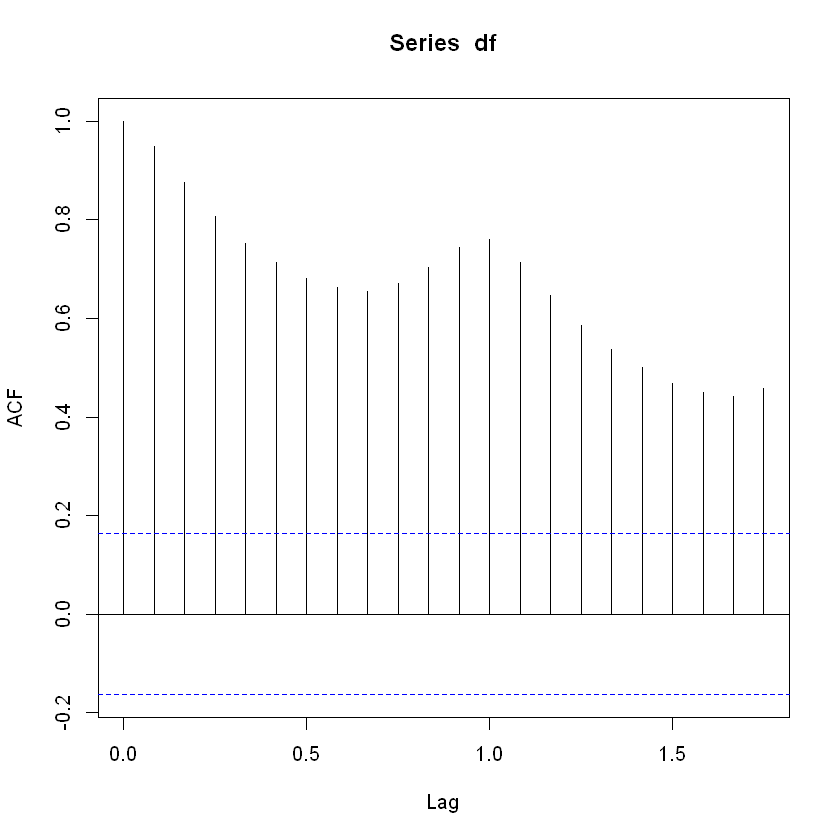

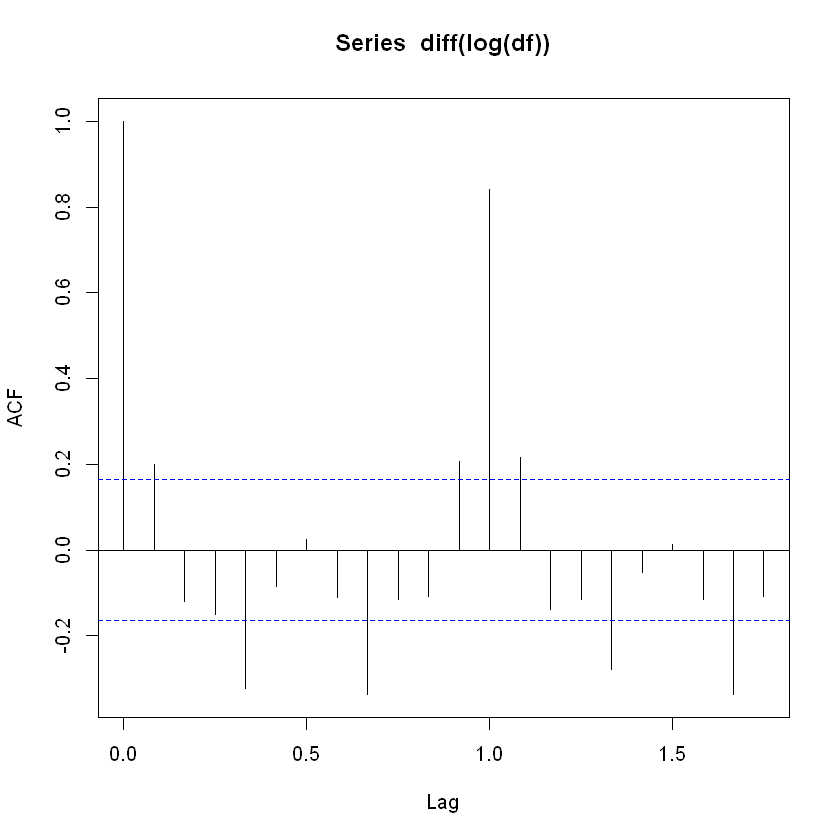

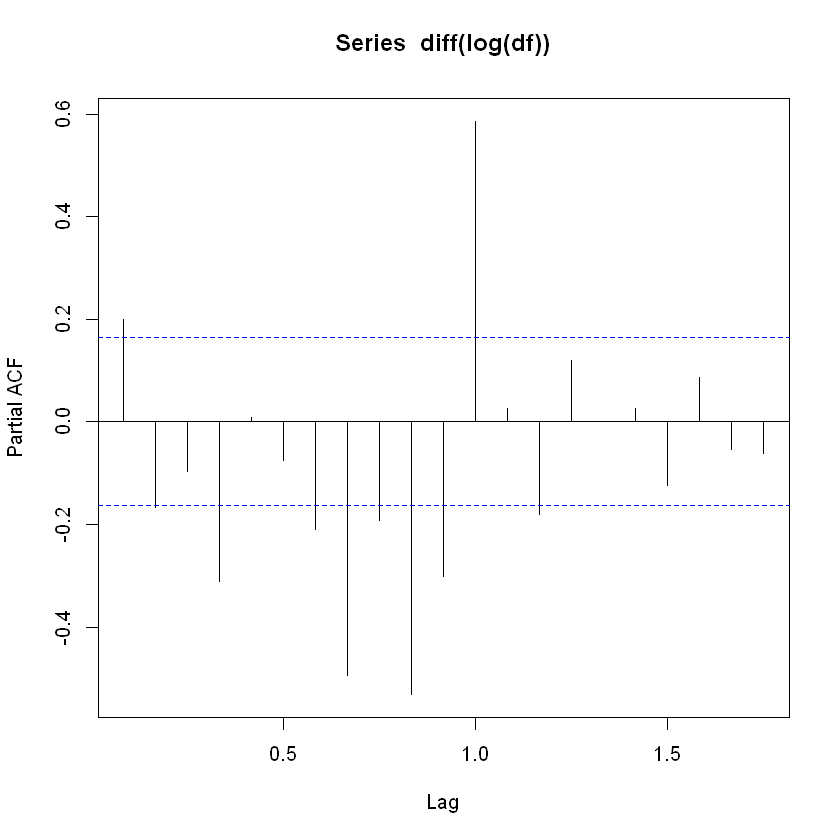

In [7]:
library(tseries)

adf.test(df, alternative = "stationary", k = 0)
acf(df)


#log is used to remove the growing variance in the series.
#Diff takes the difference of the series - to account for trend.
adf.test(diff(log(df)), alternative="stationary", k=0) 

acf(diff(log(df)))
pacf(diff(log(df)))

These plots and results suggest that a differentiated log of the series should have an auto-regressive value of 0 and moving average of 1 or 2. Exploring these options:

NOTE to self: ARIMA(P, C, Q)
   P -  Auto-Regressive lags
   C - Differentiating?
   Q - Moving Average lags

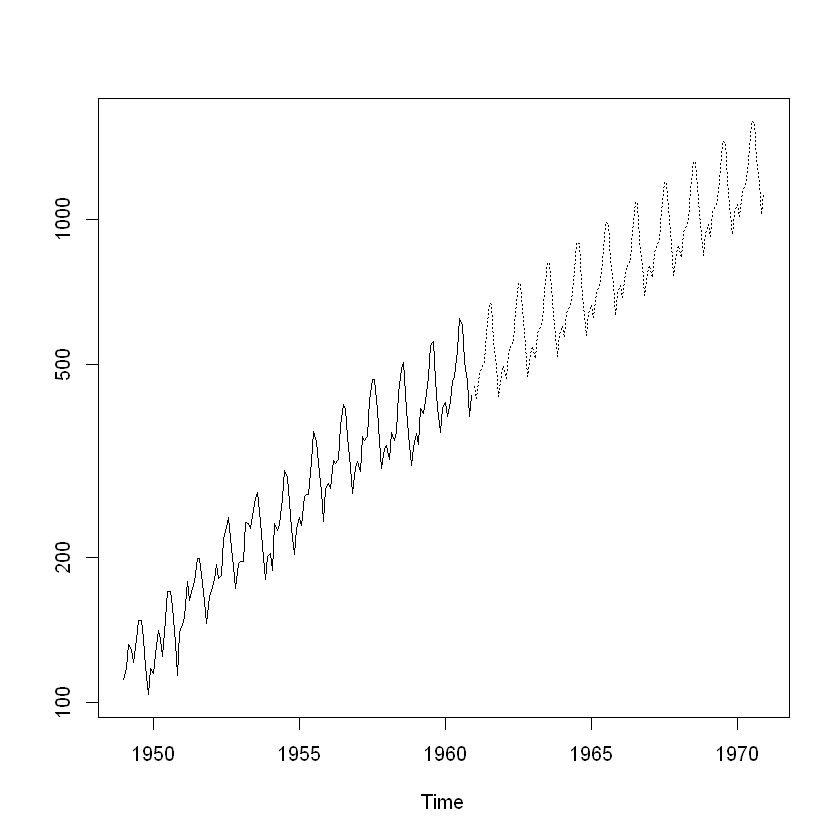

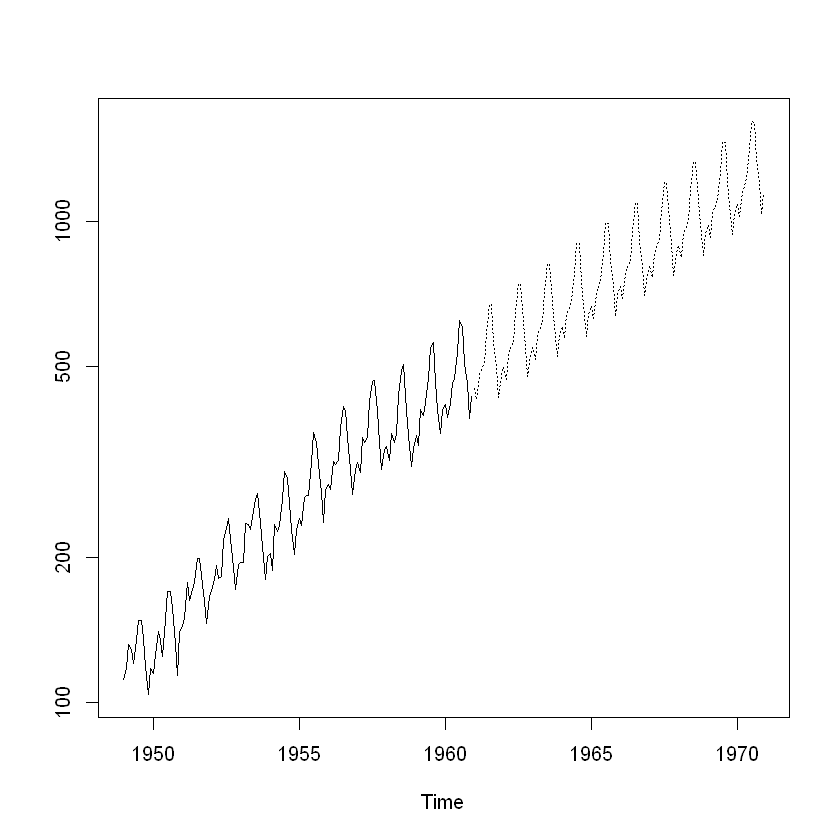

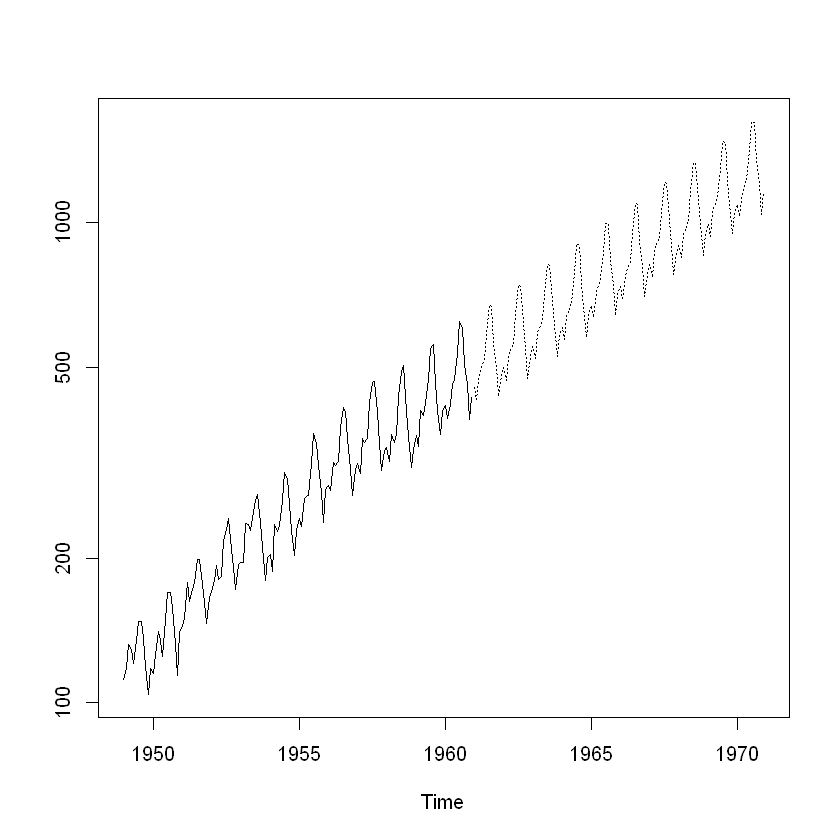

In [8]:
fit011 <- arima(log(df), c(0, 1, 1),seasonal = list(order = c(0, 1, 1), period = 12))
fit012 <- arima(log(df), c(0,1,2), seasonal = list(order = c(0, 1, 2), period = 12))

#and one more to account for the 1 spike in the PACF and 2 spikes in ACF
fit112 <- arima(log(df), c(1, 1, 2), seasonal = list(order = c(1, 1, 2), period = 12))

pred011 <- predict(fit011, n.ahead = 10*12)
ts.plot(AirPassengers,2.718^pred011$pred, log = "y", lty = c(1,3))

pred012 <- predict(fit012, n.ahead = 10*12)
ts.plot(AirPassengers,2.718^pred012$pred, log = "y", lty = c(1,3))

pred112 <- predict(fit112, n.ahead = 10*12)
ts.plot(AirPassengers,2.718^pred112$pred, log = "y", lty = c(1,3))

All relatively similar, and look impressively close to what one might expect given the past trend and seaonality in the data!  I still have plenty of practice to get any real intuition behind time-series analysis, but this has been a great start.  I hope to give this a go at that Kaggle challenge I mentioned earlier and have another post on this soon.



Thanks to Tavish at Analytics Vidhya for the write up and tutorial on this.. It's helped a lot!